In [69]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt

In [70]:
shots_df = pd.read_csv("Resources/shots_2017.csv")

In [71]:
# Show the dataframe
shots_df.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,0.196962,0.036540,0.429376,0.310837,0.019445,0.666207,1,1,WPG,37.0
1,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,0.102211,0.086022,0.434624,0.246754,0.016345,0.790477,1,1,WPG,72.0
2,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,0.207438,0.055882,0.373207,0.262948,0.022178,0.699232,1,1,WPG,70.0
3,1054132,WPG,TOR,2017,0,20001,0,17,75,31,...,0.219320,0.034028,0.438055,0.271332,0.022032,0.615064,1,0,WPG,34.0
4,1054133,WPG,TOR,2017,0,20001,0,18,106,8,...,0.147830,0.097626,0.321279,0.220833,0.022817,0.944446,0,1,TOR,80.0


In [53]:
# reduce dataframe to only include relevant columns.
shots_df.isna().sum()

shotID                   0
homeTeamCode             0
awayTeamCode             0
season                   0
isPlayoffGame            0
                        ..
xShotWasOnGoal           0
isHomeTeam               0
shotWasOnGoal            0
teamCode                 0
arenaAdjustedXCordABS    0
Length: 124, dtype: int64

In [54]:
reduced_df = shots_df[["period", "team", "location", "goal", "xCordAdjusted", "yCordAdjusted", "shotAngleAdjusted", "shotDistance", "shotType", "speedFromLastEvent",
                      "goalieIdForShot", "shooterPlayerId", "shooterLeftRight", "shooterTimeOnIce"]].copy()
reduced_df

,period,team,location,goal,xCordAdjusted,yCordAdjusted,shotAngleAdjusted,shotDistance,shotType,speedFromLastEvent,goalieIdForShot,shooterPlayerId,shooterLeftRight,shooterTimeOnIce
0,1,HOME,AWAYZONE,0,36,28,27.847578,59.941638,WRIST,3.507600,8475883.0,8477504,L,10
1,1,HOME,AWAYZONE,0,75,-1,4.085617,14.035669,WRIST,5.457220,8475883.0,8473574,L,12
2,1,HOME,AWAYZONE,0,73,-10,32.005383,18.867962,BACK,13.017083,8475883.0,8473412,R,13
3,1,HOME,AWAYZONE,0,33,19,18.741340,59.135438,WRIST,10.912378,8475883.0,8470828,L,5
4,1,AWAY,HOMEZONE,0,80,-3,18.434949,9.486833,WRIST,3.681520,8473461.0,8470611,R,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119710,3,HOME,AWAYZONE,0,83,4,33.690068,7.211103,WRIST,1.414214,8474651.0,8477949,R,28
119711,3,HOME,AWAYZONE,0,54,-33,43.315316,48.104054,WRIST,15.895911,8474651.0,8471707,L,23
119712,3,HOME,AWAYZONE,0,33,-22,21.447736,60.166436,SLAP,1.437042,8474651.0,8476525,R,57
119713,3,AWAY,Neu. Zone,0,20,-30,23.498566,75.239617,WRIST,18.562395,0.0,8473563,L,84


In [55]:
reduced_df.isna().sum()

period                 0
team                   0
location               0
goal                   0
xCordAdjusted          0
yCordAdjusted          0
shotAngleAdjusted      0
shotDistance           0
shotType              10
speedFromLastEvent     0
goalieIdForShot        0
shooterPlayerId        0
shooterLeftRight       0
shooterTimeOnIce       0
dtype: int64

In [56]:
reduced_df["shotType"].fillna("NONE", inplace=True)
reduced_df.isna().sum()

period                0
team                  0
location              0
goal                  0
xCordAdjusted         0
yCordAdjusted         0
shotAngleAdjusted     0
shotDistance          0
shotType              0
speedFromLastEvent    0
goalieIdForShot       0
shooterPlayerId       0
shooterLeftRight      0
shooterTimeOnIce      0
dtype: int64

In [57]:
X = reduced_df.copy()
y = reduced_df["goal"].copy()
X = X.drop("goal", axis=1)

reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119715 entries, 0 to 119714
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   period              119715 non-null  int64  
 1   team                119715 non-null  object 
 2   location            119715 non-null  object 
 3   goal                119715 non-null  int64  
 4   xCordAdjusted       119715 non-null  int64  
 5   yCordAdjusted       119715 non-null  int64  
 6   shotAngleAdjusted   119715 non-null  float64
 7   shotDistance        119715 non-null  float64
 8   shotType            119715 non-null  object 
 9   speedFromLastEvent  119715 non-null  float64
 10  goalieIdForShot     119715 non-null  float64
 11  shooterPlayerId     119715 non-null  int64  
 12  shooterLeftRight    119715 non-null  object 
 13  shooterTimeOnIce    119715 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 12.8+ MB


In [58]:
# Use get_dummies to create all numeric values
X = pd.get_dummies(X)
X.head()

,period,xCordAdjusted,yCordAdjusted,shotAngleAdjusted,shotDistance,speedFromLastEvent,goalieIdForShot,shooterPlayerId,shooterTimeOnIce,team_AWAY,...,shotType_BACK,shotType_DEFL,shotType_NONE,shotType_SLAP,shotType_SNAP,shotType_TIP,shotType_WRAP,shotType_WRIST,shooterLeftRight_L,shooterLeftRight_R
0,1,36,28,27.847578,59.941638,3.507600,8475883.0,8477504,10,0,...,0,0,0,0,0,0,0,1,1,0
1,1,75,-1,4.085617,14.035669,5.457220,8475883.0,8473574,12,0,...,0,0,0,0,0,0,0,1,1,0
2,1,73,-10,32.005383,18.867962,13.017083,8475883.0,8473412,13,0,...,1,0,0,0,0,0,0,0,0,1
3,1,33,19,18.741340,59.135438,10.912378,8475883.0,8470828,5,0,...,0,0,0,0,0,0,0,1,1,0
4,1,80,-3,18.434949,9.486833,3.681520,8473461.0,8470611,2,1,...,0,0,0,0,0,0,0,1,0,1


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [60]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# # Train the Logistic Regression model on the scaled data and print the model score
from sklearn.linear_model import LogisticRegression
lrs = LogisticRegression(solver="liblinear")

lrs.fit(X_train_scaled, y_train)
print("Testing Score:", lrs.score(X_test_scaled, y_test))
print("Training Score:", lrs.score(X_train_scaled, y_train))

Testing Score: 0.933977079087173
Training Score: 0.934945314414274


In [62]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = lrs.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[27889,    33],
       [ 1943,    64]], dtype=int64)

In [63]:
# confusion matrix accuracy
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.933977079087173


In [68]:
# print predictions
print(f'Actual:\t\t{list(y_test[:100])}')
print(f'Predicted:\t{list(lrs.predict(X_test[:100]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [65]:
# Import dependencies for roc_curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [66]:
y_pred_proba = lrs.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

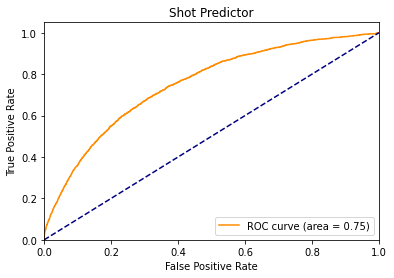

In [67]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Shot Predictor')
plt.legend(loc="lower right")
plt.show()